In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yt_data = pd.read_csv("youtubers_df.csv")
yt_data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


# 1. Data Exploration

In [3]:
yt_data.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [4]:
yt_data['Categories'].value_counts()

Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

In [5]:
len(yt_data['Categories'])

1000

In [6]:
yt_data.dropna(inplace=True)

In [8]:
yt_data.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [9]:
yt_data.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [16]:
yt_data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [10]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        694 non-null    int64  
 1   Username    694 non-null    object 
 2   Categories  694 non-null    object 
 3   Suscribers  694 non-null    float64
 4   Country     694 non-null    object 
 5   Visits      694 non-null    float64
 6   Likes       694 non-null    float64
 7   Comments    694 non-null    float64
 8   Links       694 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 54.2+ KB


In [11]:
yt_data.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,694.000000,6.940000e+02,6.940000e+02,6.940000e+02,694.000000
mean,495.298271,2.241556e+07,1.210730e+06,5.347360e+04,1558.793948
std,289.222212,1.824123e+07,6.038274e+06,2.979711e+05,7967.470234
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,244.250000,1.380000e+07,3.692500e+04,5.685000e+02,2.000000
50%,492.500000,1.680000e+07,1.587000e+05,3.550000e+03,78.000000
75%,746.750000,2.390000e+07,8.339000e+05,2.377500e+04,499.750000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


# 2. Trend Analysis

### Identify trends among the top YouTube streamers. Which categories are the most popular?

In [12]:
yt_data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...


In [15]:
yt_data['Username'].value_counts()

Username
mgcplayhouse                2
NickyJamTV                  2
Family-Box                  2
HiTechIslamic               2
Super_Senya_RU              2
                           ..
BabyBusID                   1
-genevievesplayhouse1465    1
JoseComilaoTotoy            1
jakepaul                    1
OneindiaHindi               1
Name: count, Length: 689, dtype: int64

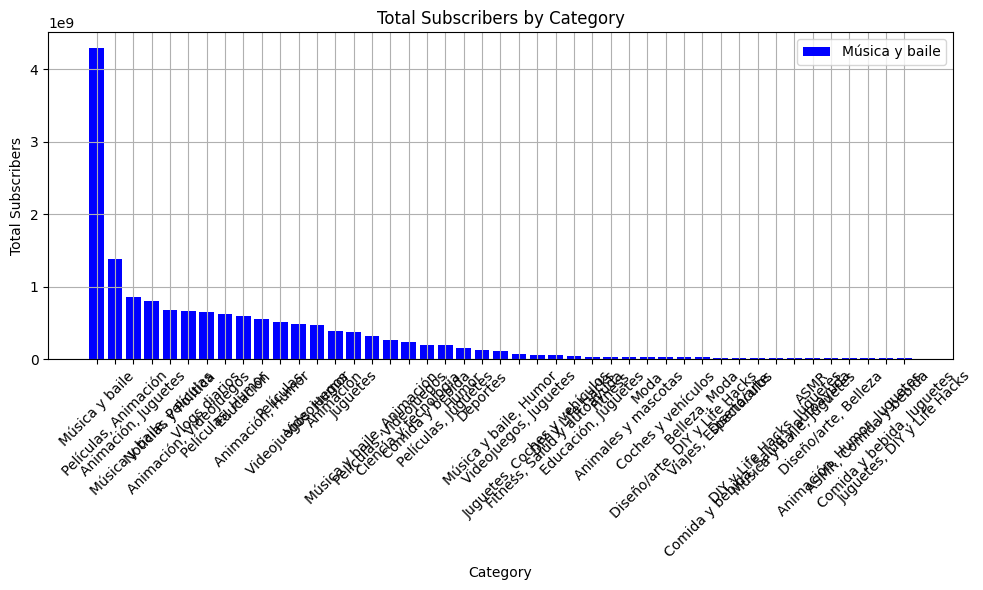

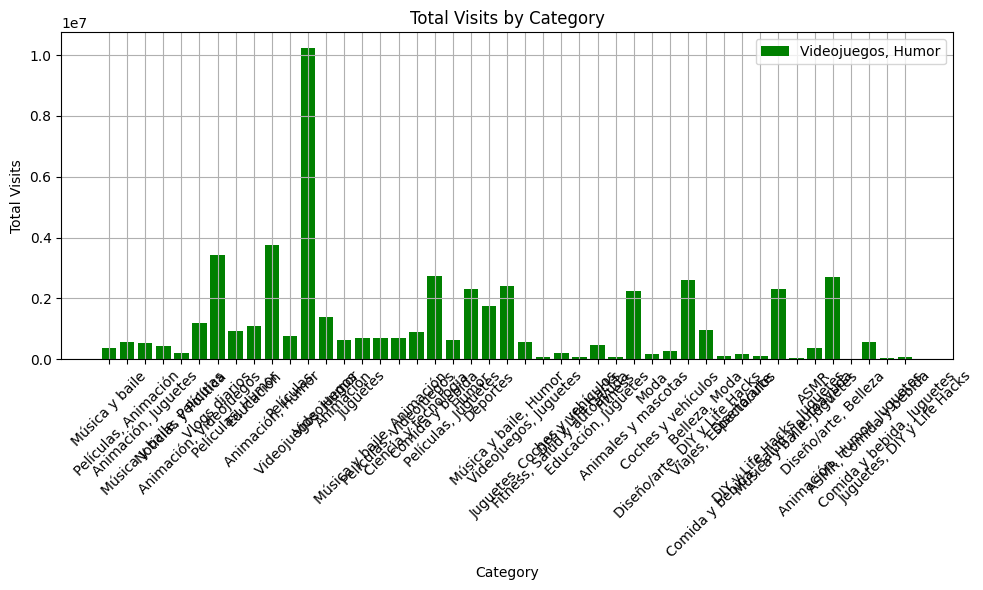

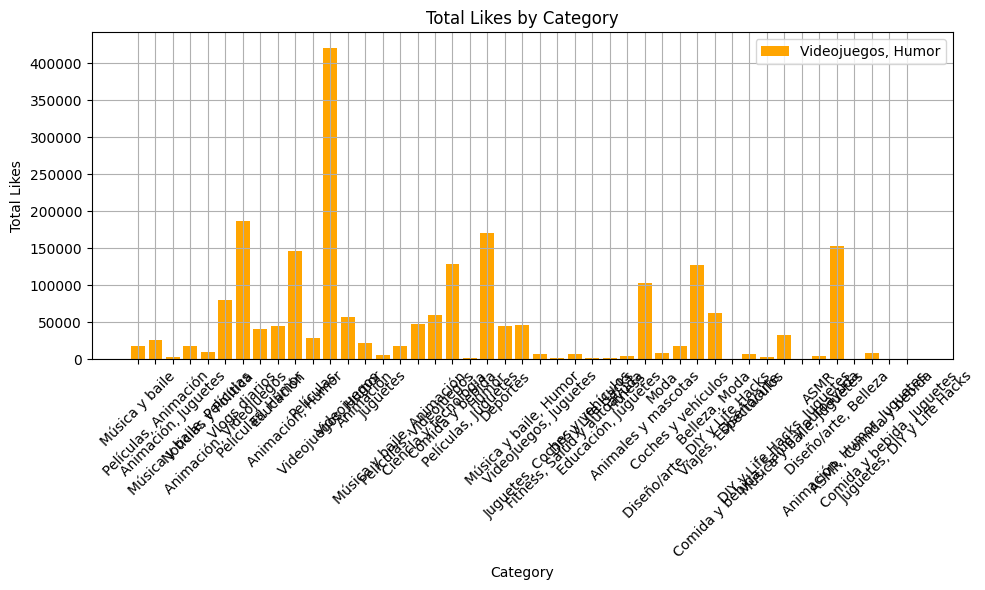

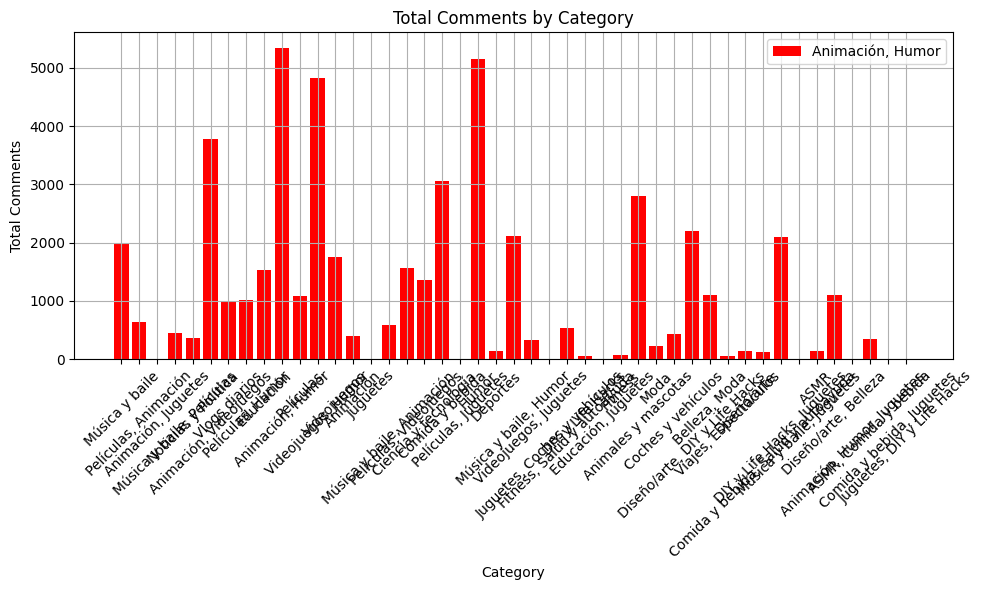

The most popular category among top YouTube streamers in each metric:
Total Subscribers: Música y baile
Total Visits: Videojuegos, Humor
Total Likes: Videojuegos, Humor
Total Comments: Animación, Humor
The most popular category among top YouTube streamers is: Música y baile


In [30]:
category_stats = yt_data.groupby('Categories').agg({

    'Suscribers': 'sum',
    'Visits': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'

})
# sorting the category by total subscribes

category_stats = category_stats.sort_values(by='Suscribers', ascending=False)
# Plotting Total Subscribers by Category
# Get the most popular category for each metric
most_popular_category_subs = category_stats.idxmax()['Suscribers']
most_popular_category_visits = category_stats.idxmax()['Visits']
most_popular_category_likes = category_stats.idxmax()['Likes']
most_popular_category_comments = category_stats.idxmax()['Comments']

# Plotting Total Subscribers by Category
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(category_stats.index, category_stats['Suscribers'], color='blue', label='Total Subscribers')
plt.title('Total Subscribers by Category')
plt.xlabel('Category')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=45)
plt.legend([most_popular_category_subs])
plt.tight_layout()
plt.show()

# Plotting Total Visits by Category
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(category_stats.index, category_stats['Visits'], color='green', label='Total Visits')
plt.title('Total Visits by Category')
plt.xlabel('Category')
plt.ylabel('Total Visits')
plt.xticks(rotation=45)
plt.legend([most_popular_category_visits])
plt.tight_layout()
plt.show()

# Plotting Total Likes by Category
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(category_stats.index, category_stats['Likes'], color='orange', label='Total Likes')
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.legend([most_popular_category_likes])
plt.tight_layout()
plt.show()

# Plotting Total Comments by Category
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(category_stats.index, category_stats['Comments'], color='red', label='Total Comments')
plt.title('Total Comments by Category')
plt.xlabel('Category')
plt.ylabel('Total Comments')
plt.xticks(rotation=45)
plt.legend([most_popular_category_comments])
plt.tight_layout()
plt.show()

# Identify the most popular category
print("The most popular category among top YouTube streamers in each metric:")
print("Total Subscribers:", most_popular_category_subs)
print("Total Visits:", most_popular_category_visits)
print("Total Likes:", most_popular_category_likes)
print("Total Comments:", most_popular_category_comments)

# Identify the most popular category
most_popular_category = category_stats.idxmax()['Suscribers']
print("The most popular category among top YouTube streamers is:", most_popular_category)

In [24]:
yt_data['Suscribers'].

0

In [31]:
yt_data['Categories'].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación',
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor, Jug

In [32]:
len(yt_data['Categories'].unique())

45

### Is there a correlation between the number of subscribers and the number of likes or comments?

In [33]:
subscribers_likes_comments = yt_data[['Suscribers', 'Likes', 'Comments']]

# Computing the correlation matrix
correlation_matrix = subscribers_likes_comments.corr(method='pearson')

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            Suscribers     Likes  Comments
Suscribers    1.000000  0.248389  0.037293
Likes         0.248389  1.000000  0.311424
Comments      0.037293  0.311424  1.000000


The correlation matrix shows the correlation coefficients between the number of subscribers, likes, and comments:

The correlation coefficient between subscribers and likes is approximately 0.248, indicating a weak positive correlation. This suggests that there is a slight tendency for channels with more subscribers to receive more likes, but the relationship is not very strong.

The correlation coefficient between subscribers and comments is approximately 0.037, indicating a very weak positive correlation. This suggests that there is almost no linear relationship between the number of subscribers and the number of comments.

The correlation coefficient between likes and comments is approximately 0.311, indicating a moderate positive correlation. This suggests that there is a moderate tendency for videos with more likes to also receive more comments, although the relationship is not extremely strong.

Overall, based on these correlation coefficients, we can conclude that there is a weak positive correlation between subscribers and likes, a very weak positive correlation between subscribers and comments, and a moderate positive correlation between likes and comments.

Audience Distribution by Country and Category:
                                       Suscribers      Visits       Likes  \
Country        Categories                                                   
Arabia Saudita Animación, Videojuegos   26.204239   34.537344   86.470588   
               Música y baile           73.795761   65.462656   13.529412   
Argelia        Educación               100.000000  100.000000  100.000000   
Argentina      Animación                27.604726   47.613479   32.593056   
               Películas                15.252417    0.639858    0.187676   
...                                           ...         ...         ...   
Unknown        Películas, Humor          3.303321    3.614008    7.868176   
               Películas, Juguetes       5.603952    8.699355    2.640186   
               Películas, Videojuegos    0.838985    0.021755    0.036755   
               Videojuegos, Juguetes     1.476263    0.651888    0.880355   
               Vlogs diarios 

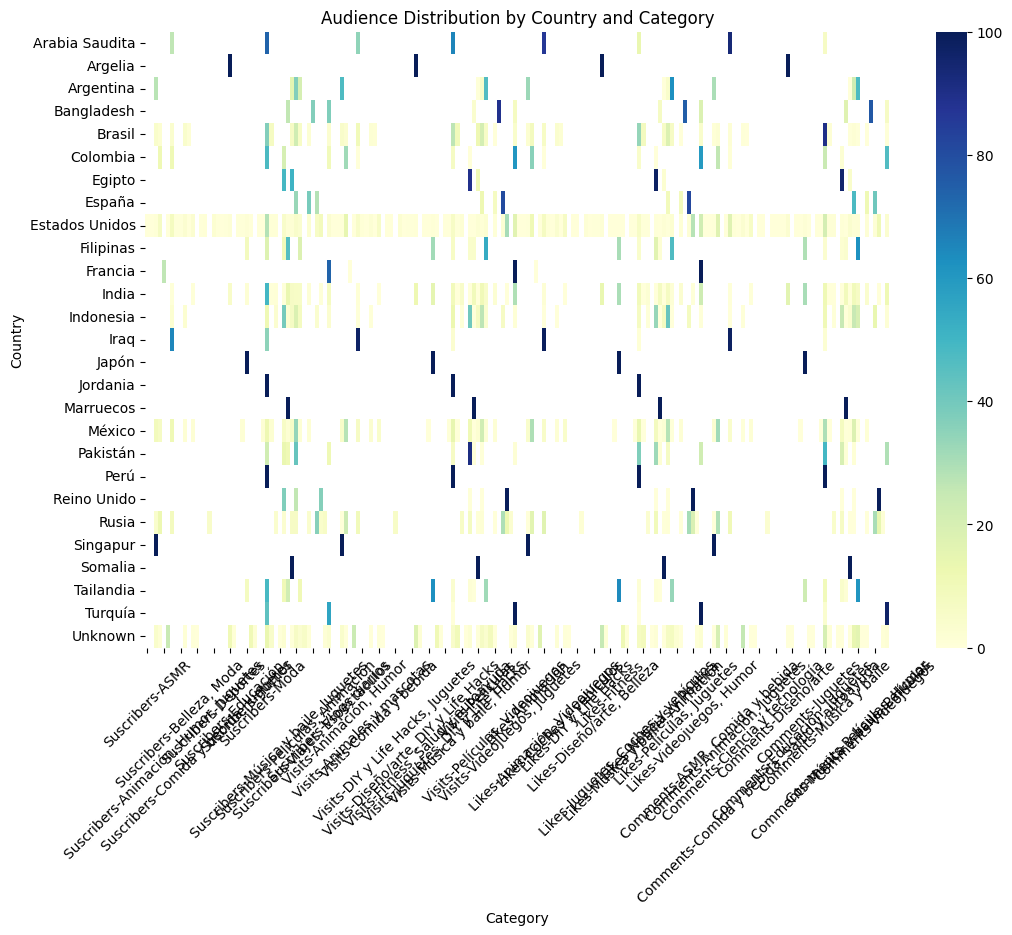

In [34]:
audience_distribution = yt_data.groupby(['Country', 'Categories']).agg({
    'Suscribers': 'sum',
    'Visits': 'sum',
    'Likes': 'sum',
    'Comments': 'sum'
})

# Normalize metrics to get the percentage distribution within each country
audience_distribution_percentage = audience_distribution.div(audience_distribution.groupby(level=0).sum()) * 100
print("Audience Distribution by Country and Category:")
print(audience_distribution_percentage)
plt.figure(figsize=(12, 8))
sns.heatmap(audience_distribution_percentage.unstack(level=1), cmap='YlGnBu')
plt.title('Audience Distribution by Country and Category')
plt.xlabel('Category')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()